In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd



In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [3]:
infilenames = ['GaiaSource_000000-003111.csv.gz']
infilenames += ['GaiaSource_668805-668856.csv.gz']
#infilenames += ['GaiaSource_472714-472767.csv.gz']
#infilenames += ['GaiaSource_786097-786431.csv.gz']

In [4]:
li = []

for infilename in infilenames:
    print(infilename)
    df = pd.read_csv(infilename, compression='gzip')
    li.append(df)
    
df = pd.concat(li, axis=0, ignore_index=True)
    

GaiaSource_000000-003111.csv.gz
GaiaSource_668805-668856.csv.gz


[GAIA source documentation](https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html)

In [5]:
df.columns

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'nu_eff_used_in_astrometry', 'pseudocolour',
       'pseudocolour_error', 'ra_pseudocolour_corr', 'dec_pseudocolour_corr',
       'parallax_pseudocolour_corr', 'pmra_pseudocolour_corr',
       'pmdec_pseudocolour_corr', 'astrometric_matched_transits',
 

In [6]:
np.unique(df['dr2_radial_velocity'])

array([-229.38147, -227.5451 , -214.83806, ...,        nan,        nan,
              nan])

In [7]:
rv = df['dr2_radial_velocity']
rv = rv.dropna()

print(f"{len(rv)} entries with rv as a number")
print(f"{len(df)} total entries")

9988 entries with rv as a number
1038642 total entries


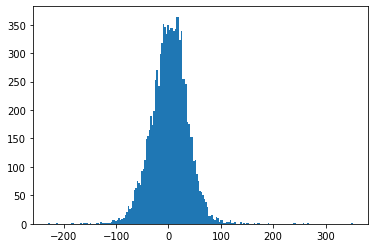

In [8]:
plt.hist(rv,bins=200);

In [9]:
dfgood = df[~df['dr2_radial_velocity'].isnull()]
#dfgood = df

In [10]:
len(dfgood)

dfgood['ra']

34          45.132144
41          45.058168
121         45.034343
155         45.165009
197         45.234476
              ...    
1037290    230.579823
1037329    230.445216
1037621    230.491188
1037821    230.441799
1038026    230.503246
Name: ra, Length: 9988, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


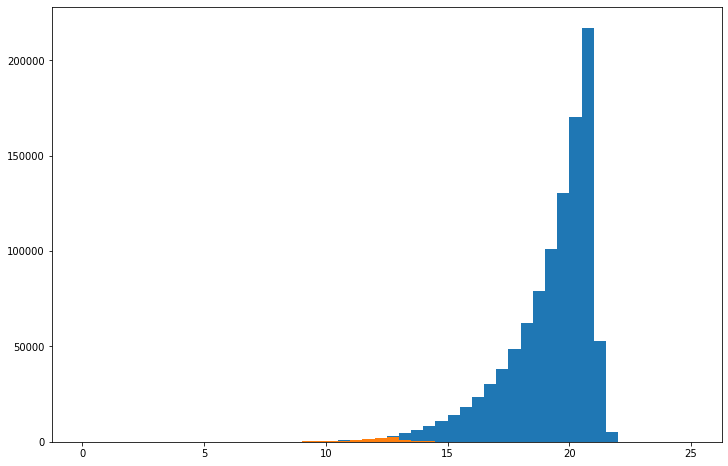

In [11]:
x = dfgood['dr2_radial_velocity']
y = dfgood['phot_g_mean_mag']
y0 = df['phot_g_mean_mag']

plt.figure(figsize=(12,8))
plt.hist(y0,bins=50,range=(0,25))
plt.hist(y,bins=50,range=(0,25));

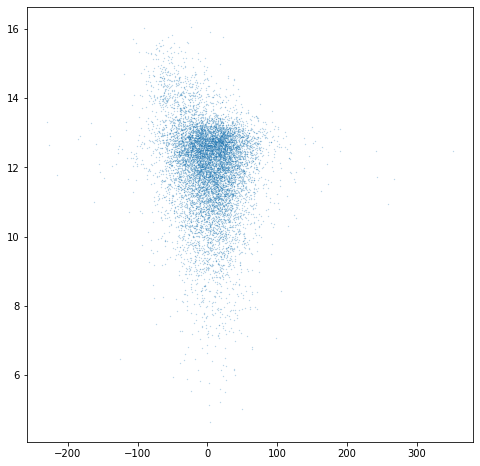

In [12]:
plt.figure(figsize=(8,8))
plt.plot(x,y,'.',alpha=0.5,markersize=0.5)

https://en.wikipedia.org/wiki/Galactic_coordinate_system

https://astronomy.stackexchange.com/questions/35536/transforming-galactic-coordinates-in-cartesian-with-distance

https://en.wikipedia.org/wiki/Stellar_parallax

[Parsec](https://en.wikipedia.org/wiki/Parsec) is the units for $1/\textrm{parallax}$. 1 parsec = 3.26 light-years.

I think the units of parsecs is milliarcsecs (mas).

What to do about negative parallax?

https://astronomy.stackexchange.com/questions/26250/what-is-the-proper-interpretation-of-a-negative-parallax

Also, ecliptic coordinates are in the data

https://en.wikipedia.org/wiki/Ecliptic_coordinate_system

and l and b are in there explicitly. 

In [13]:
c_icrs = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
c_icrs.galactic

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>

In [14]:
#def galactic_coordinates(ra, dec, parallax):
def galactic_coordinates(l, b, parallax):

    #c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    
    #l = c.galactic.l.rad
    #b = c.galactic.b.rad
    
    lrad = np.deg2rad(l)
    brad = np.deg2rad(b)
    
    # Assume that parallax is passed in as milliarcsec
    conversion = 0.001 # Convert milliarcsec to arcsec
    one_over_p = 1/(parallax*conversion)

    x = one_over_p*np.cos(brad)*np.cos(lrad)
    y = one_over_p*np.cos(brad)*np.sin(lrad)
    z = one_over_p*np.sin(brad)
    
    return x,y,z
    

In [15]:
ra_org = dfgood['ra']
dec_org = dfgood['dec']
p_org = dfgood['parallax']

l_org = dfgood['l']
b_org = dfgood['b']


1

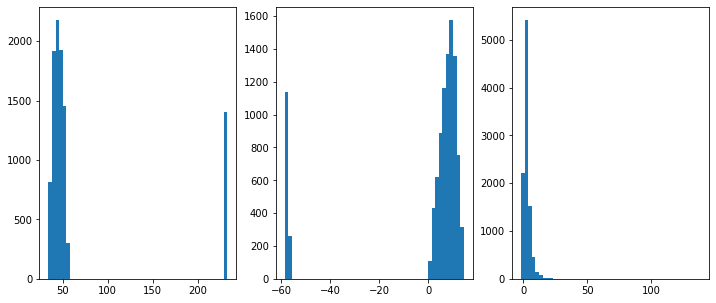

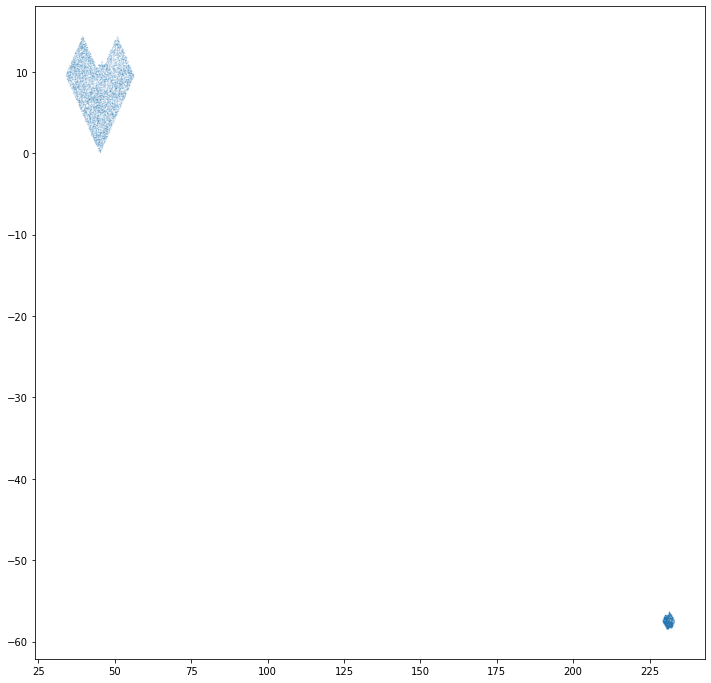

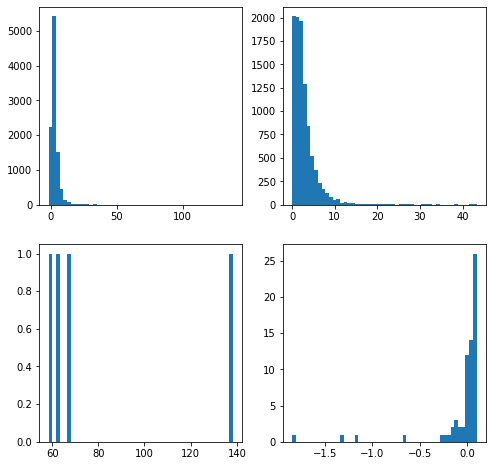

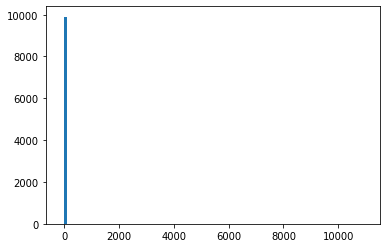

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.hist(ra_org,bins=50)

plt.subplot(1,3,2)
plt.hist(dec_org,bins=50)

plt.subplot(1,3,3)
plt.hist(p_org,bins=50)

plt.figure(figsize=(12,12))
plt.plot(ra_org,dec_org,'.',markersize=0.5,alpha=0.2)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.hist(p_org,bins=50)


plt.subplot(2,2,2)
plt.hist(p_org[(p_org<50) & (p_org>0)],bins=50)

plt.subplot(2,2,3)
plt.hist(p_org[p_org>50],bins=50)

plt.subplot(2,2,4)
plt.hist(p_org[p_org<0.1],bins=50)

plt.figure()
plt.hist(1/p_org,bins=100)

1

In [17]:
x,y,z = galactic_coordinates(10,20,0.5)

print(x,y,z)

1850.8331567966466 326.3518223330696 684.0402866513374


Someone else's visualization of within 3000 parsecs

https://www.cosmos.esa.int/web/gaia/iow_20180614

In [18]:
#mask = (p_org>0.1) & (ra_org == ra_org)
mask = (p_org>0.1)


#ra = ra_org[mask].values
#dec = dec_org[mask].values

l = l_org[mask].values
b = b_org[mask].values

p = p_org[mask].values
            

#x,y,z = galactic_coordinates(ra, dec, p)
x,y,z = galactic_coordinates(l, b, p)


#fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(projection='3d')
#
#plt.plot(x,y,z,'.',markersize=0.5,alpha=0.2)

1

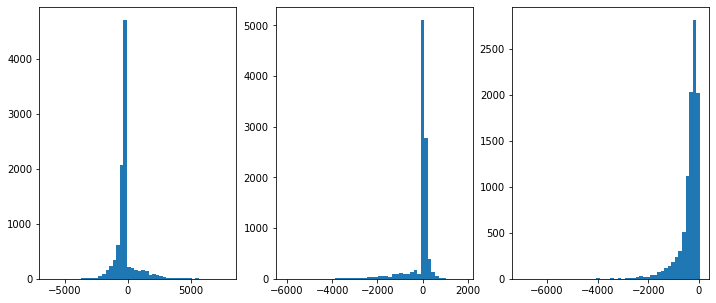

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.hist(x,bins=50)

plt.subplot(1,3,2)
plt.hist(y,bins=50)

plt.subplot(1,3,3)
plt.hist(z,bins=50)

1

In [20]:
rv = dfgood['dr2_radial_velocity']

In [21]:
len(rv)

9988

1

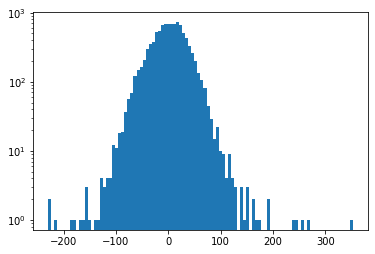

In [22]:
plt.figure()
plt.hist(rv,bins=100)
plt.yscale('log')

1

In [23]:
x,y,z

(array([-246.21102158, -371.20739104, -117.58491166, ..., 2214.3466086 ,
        1231.9815464 , 1384.75604732]),
 array([   13.12001428,    20.21257097,     6.69666117, ...,
        -1698.85494243,  -945.83433694, -1062.07487944]),
 array([-280.77073265, -424.2416082 , -134.12902159, ...,   15.27915505,
           9.05395346,    9.569219  ]))

In [24]:
rv

34         33.840440
41          4.572674
121         6.404075
155       -26.394058
197       -48.504974
             ...    
1037290    -1.268521
1037329    -6.034291
1037621   -37.010674
1037821    -4.051786
1038026   -21.562489
Name: dr2_radial_velocity, Length: 9988, dtype: float64

In [25]:
df.columns

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'nu_eff_used_in_astrometry', 'pseudocolour',
       'pseudocolour_error', 'ra_pseudocolour_corr', 'dec_pseudocolour_corr',
       'parallax_pseudocolour_corr', 'pmra_pseudocolour_corr',
       'pmdec_pseudocolour_corr', 'astrometric_matched_transits',
 

In [26]:
df['ecl_lon']

0           42.533726
1           42.546573
2           42.546872
3           42.542548
4           42.513192
              ...    
1038637    244.138684
1038638    244.142256
1038639    244.149469
1038640    244.147638
1038641    244.147642
Name: ecl_lon, Length: 1038642, dtype: float64

In [27]:
dfgood['parallax']

34         2.676207
41         1.772803
121        5.602294
155        3.800303
197        4.329846
             ...   
1037290    0.934765
1037329    0.998974
1037621    0.358295
1037821    0.643828
1038026    0.573008
Name: parallax, Length: 9988, dtype: float64

In [28]:
#!pip install plotly

In [29]:
import plotly.express as px
import plotly.graph_objects as go


In [31]:
#px.scatter_3d(x,y,z,'.')
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers', marker=dict(size=1))])

fig.show()

Proper motion

https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html
    

https://en.wikipedia.org/wiki/Proper_motion#:~:text=Proper%20motion%20is%20the%20astrometric,of%20the%20more%20distant%20stars.
    
 
pmra,pmdec
    

In [32]:
pmra = dfgood['pmra']
pmdec = dfgood['pmdec']

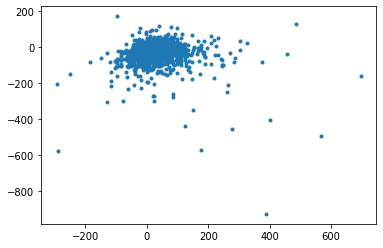

In [33]:
#mask = pmdec<1600
mask = pmdec<1000


plt.plot(pmra[mask],pmdec[mask],'.')

In [34]:
p = dfgood['parallax']
pm = dfgood['pm']


conversion = 0.001 # Convert milliarcsec to arcsec
one_over_p = 1/(p*conversion)
distance = one_over_p

vmag = np.sqrt(rv[mask]**2 + (distance[mask]*(pm[mask]/3.1e8))**2)

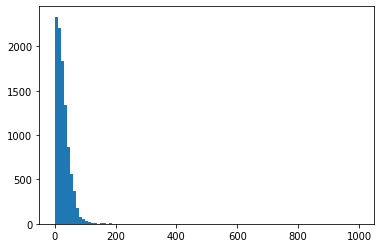

In [35]:
plt.hist(vmag,bins=100,range=(0,1000));

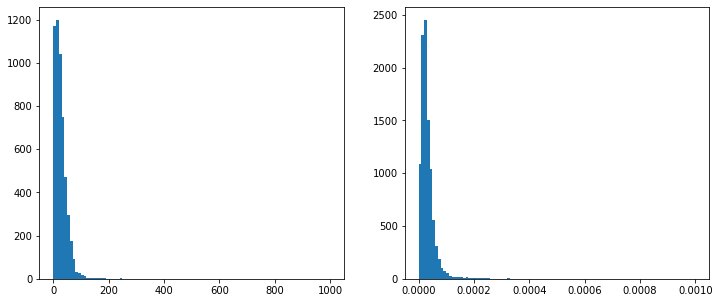

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

plt.hist(rv[mask],bins=100,range=(0,1000));

plt.subplot(1,2,2)

plt.hist(distance[mask]*pm[mask]/3.1e8,bins=100,range=(0,0.001))

1;

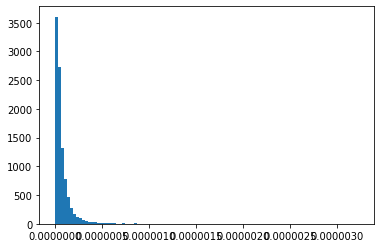

In [37]:
plt.hist(pm[mask]/3.1e8,bins=100);

In [ ]:
max(distance[mask]*pm[mask]/3.1e8)